In [ ]:
from google.colab import files
uploaded = files.upload()

Confusion Matrix:
[[311   0]
 [  0 189]]


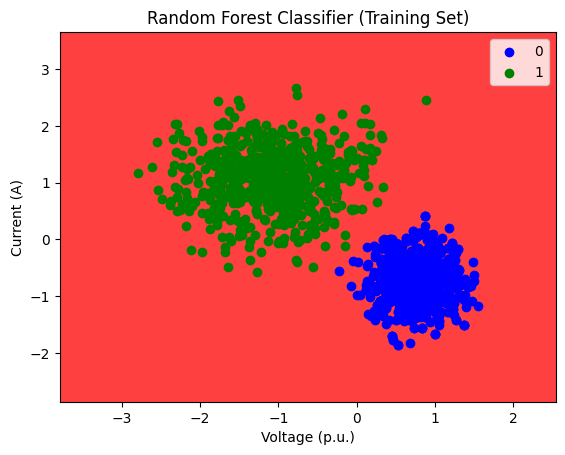

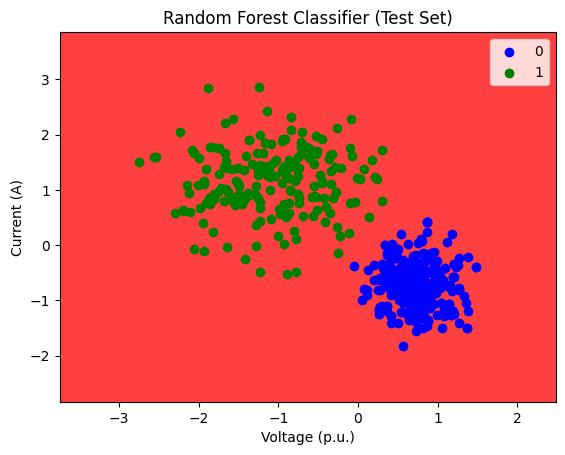

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

df = pd.read_csv(next(iter(uploaded)))

# Calculate ROCPA (Rate of Change of Power Angle) in code
df['ROCPA'] = df['Power_Angle'].diff().fillna(0).abs()

# Prepare features and target
X = df[['Voltage', 'Current', 'Power_Angle', 'ROCPA']].values
Y = df['Swing'].values

# Split into training and test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Scale features
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Train Random Forest model
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_Train, Y_Train)

# Predict and evaluate
Y_Pred = classifier.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix:")
print(cm)

# Visualization function using only Voltage and Current
def visualize_results(X_Set, Y_Set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01)
    )

    fixed_angle = 40
    fixed_rocpa = 2.0

    input_grid = np.array([
        X1.ravel(),
        X2.ravel(),
        np.full_like(X1.ravel(), fixed_angle),
        np.full_like(X1.ravel(), fixed_rocpa)
    ]).T

    Z = classifier.predict(input_grid).reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    color=ListedColormap(('blue', 'green'))(i), label=j)

    plt.title(title)
    plt.xlabel('Voltage (p.u.)')
    plt.ylabel('Current (A)')
    plt.legend()
    plt.show()

# Visualize training and test set
visualize_results(X_Train, Y_Train, 'Random Forest Classifier (Training Set)')
visualize_results(X_Test, Y_Test, 'Random Forest Classifier (Test Set)')